<a href="https://colab.research.google.com/github/johyunkang/MLwithPythonCookbook/blob/main/9_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 특성 추출을 사용한 차원 축소

9.1 주성분을 사용해 특성 줄이기

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)의 하이퍼파라미터 
- n_components 
    - 0 ~ 1 : 해당 비율의 분산을 유지할 수 있는 최소한의 특성 개수를 반환. 0.95와 0.99가 자주 사용
    - 1 이상 : 해당 수 만큼의 주성분을 반환
- whiten=True : 각 주성분의 값을 평균이 0이고 분산이 1이 되도록 변환 (False가 default). 주성분에 투영된 특성의 스케일을 맞추는 역할
- solver="randomized" : 아주 짧은 시간 안에 첫번째 주성분을 찾아주는 확률적 알고리즘을 사용

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


(1797, 64)

원본 특성 개수: (1797, 64)
pca 후 특성 개수: (1797, 54)


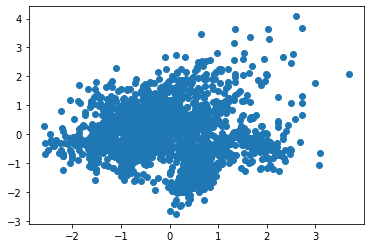

화이트닝 되어서 두 특성의 스케일이 비슷함.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

digits = datasets.load_digits()
df = pd.DataFrame(digits.data)
display(df.head())
display(df.describe())

features = StandardScaler().fit_transform(df)

display(features.shape)

# 99%의 분산을 유지하도록 PCA 클래스 객체 생성
# n_componnts : 1
pca = PCA(n_components=0.99, whiten=True) # whiten (default=False) : Whitening 의 준말
features_pca = pca.fit_transform(features)

print('원본 특성 개수:', features.shape)
print('pca 후 특성 개수:', features_pca.shape)

from matplotlib import pyplot as plt
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()
print('화이트닝 되어서 두 특성의 스케일이 비슷함.')

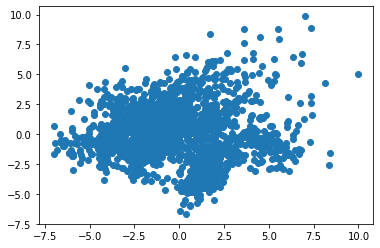

화이트닝 옵션을 적용하지 않아 평균은 0이지만 스케일은 맞춰지지 않음


In [16]:
pca_no_whiten = PCA(n_components=0.99)
features_no_whiten = pca_no_whiten.fit_transform(features)
plt.scatter(features_no_whiten[:, 0], features_no_whiten[:, 1])
plt.show()
print('화이트닝 옵션을 적용하지 않아 평균은 0이지만 스케일은 맞춰지지 않음')

In [17]:
print('PCA 적용된 컴포넌트 갯수:', pca_no_whiten.components_.shape)

PCA 적용된 컴포넌트 갯수: (54, 64)


`n_components` 파라미터를 지정하지 않으면 특성 개수만큼 주성분이 만들어짐

주성분에 의해 설명된 분산은 `explained_variance_ratio_` 속성에 저장되어 있음

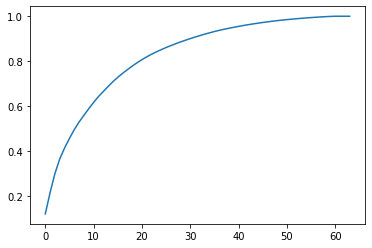

약 30개의 주성분으로도 80% 이상의 분산을 유지하고 있음


올바르게 분산으로 계산하기 위해서는 원본 데이터를 그대로 PCA로 주입하는것이 좋음


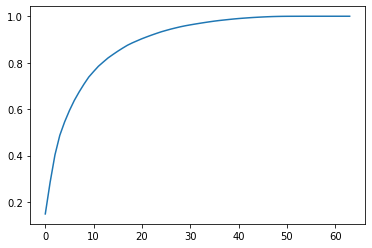

In [19]:
import numpy as np
pca = PCA(whiten=True).fit(features)
# cumsum 을 이용하여 누적합 구하기
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

print('약 30개의 주성분으로도 80% 이상의 분산을 유지하고 있음')

print('\n\n올바르게 분산으로 계산하기 위해서는 원본 데이터를 그대로 PCA로 주입하는것이 좋음')
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기